In [7]:
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库

In [8]:
# 读取文件
fn = open('dan_.txt') # 打开文件
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件


In [9]:
# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|，|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除
print(string_data)

胖版方一凡？胖版方一凡？这爱如海大爱如海大海纳百川取则行远海纳百川 取则行远海大排面 毕业整整两年了复旦NBNZYTCN海纳百川取则行远海纳百川取则行远看不到太原理工大津南排面！规格严格 功夫到家哈工大nb！！！虽然是职中但还是忍不住加油加油加油自强不息厚德载物清华清华清华东师！欢迎报考吉林大学！！！！2021我一定会来吉大 吉大北理冲呀北理工渤海之滨 白河之津～欢迎报考吉林大学和北京师范大学西交09级学子前来报道欢迎报考东北大学规格严格 功夫到家欢迎报考陕西师范大学加油！清华！清华~~~~财大！211我一定要考上啊啊啊啊啊好好听海纳百川取则行远238号清华新学堂！西交牌面西安交大牌面南开牌面欢迎报考吉林大学允公允能 日新月异南开必须有排面南开等我文苑路北大等我！清华大学吾等来了泪目西交等我 等我财大nb！南开！南开等我南开等我！西交等我清华等我2022年北大等我欢迎报考仙交我的长理可能并不怎么好 但是我爱他有质感的声音处理的好好听邓睿涵nb为邓睿涵打call~邓比比！！爱如海大浩海求索立言济世内蒙古农业大学浩海求索立言济世欢迎加入中国海洋大学欢迎报考大连理工大学2020考上中山大学邓比比nb！！西安交大！！欢迎报考吉林大学！！吉大！！！吉大！！欢迎报考浙江大学软件学院欢迎报考西安建筑科技大学啊啊啊啊大工大工就在我家旁边啊啊啊啊大工！！！！！！！我要努力允公允能 日新月异西农的别走诚朴勇毅知中国 服务中国欢迎报考中央美术学院中财海纳百川取则行远欢迎报考中国海洋大学海乃百川取则行远欢迎报考中国海洋大学nku南开南开南开！南开！河南大学学长北师大等我！！欢迎报考清华大学大工啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊这个声音好好听爱如海大玉兰花冲排面排面后浪仙交大腾飞塔仙交牌面立足燕园解放清华！欢迎报考清华大学泪目大工毕业生报到欢迎报考西安交通大学！！清华等我！！为世界之光！！！精勤求学敦笃励志果毅力行忠恕任事精勤求学敦笃励志果毅力行忠恕任事西安交通大学！！欢迎报考西安交通大学欢迎报考西安交通大学！！厚德载物至诚至勤欢迎报考辽宁大学小小南翻加油~~~~[]~￣▽￣~*小小南翻加油~~~~[]~￣▽￣~*小小南翻加油~~~~[]~￣▽￣~*这学校。。。全明星啊他们活成了我想活的样子允公允能日新月异允公允能日新月异南开大学欢迎你腾飞塔！为世界之光医学院！！！我交牛逼！！！我梦中的

In [42]:
#增添一些校训等不希望被分割的词

jieba.suggest_freq('允公允能日新月异', tune=True)
jieba.suggest_freq('立德敬业博学敬先', tune=True)
jieba.suggest_freq('燕园', tune=True)
jieba.suggest_freq('海纳百川取则行远', tune=True)
jieba.suggest_freq('龙马担乾坤', tune=True)
jieba.suggest_freq('德以明理学以精工', tune=True)
jieba.suggest_freq('bit', tune=True)
jieba.suggest_freq('BIT', tune=True)
jieba.suggest_freq('深圳大学', tune=True)
jieba.suggest_freq('国防科技大学', tune=True)
jieba.suggest_freq('规格严格功夫到家', tune=True)
jieba.suggest_freq('哈工大', tune=True)
jieba.suggest_freq('自强不息厚德载物', tune=True)
jieba.suggest_freq('团结进取求实创新', tune=True)
jieba.suggest_freq('德才兼备', tune=True)
jieba.suggest_freq('中国传媒大学', tune=True)
jieba.suggest_freq('世界之光', tune=True)

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []

#去停用词
stopwords=[]
for word in open('hit-stopwords.txt','r'):
    stopwords.append(word.strip())

remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',u'需要',u'/',u'n',u'\\','>'] # 自定义其他去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        if word not in stopwords:#如果不在停用词库中
            object_list.append(word) # 分词追加到列表

        
# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top = word_counts.most_common(600) # 获取最高频的词
print (word_counts_top) # 输出检查



[('欢迎', 2996), ('报考', 2485), ('排面', 1353), ('哈工大', 1336), ('海大', 965), ('海纳百川取则行远', 957), ('大工', 929), ('工大', 795), ('北大', 786), ('nb', 781), ('南开', 775), ('清华', 757), ('大学', 711), ('中财', 707), ('博学', 692), ('生日快乐', 657), ('竞先', 639), ('中国', 605), ('百年', 590), ('立德', 587), ('规格严格功夫到家', 574), ('敬业', 574), ('龙马担乾坤', 565), ('海洋大学', 544), ('!', 487), ('爱', 472), ('世界之光', 457), ('中国传媒大学', 431), ('北理工', 425), ('德以明理学以精工', 409), ('去', 399), ('允公允能日新月异', 359), ('q', 357), ('自强不息厚德载物', 350), ('号', 322), ('冲冲', 321), ('鸭', 319), ('好', 317), ('工程', 315), ('加油', 309), ('北理', 298), ('车辆', 295), ('海纳百川', 293), ('交大', 283), ('哈尔滨工业大学', 281), ('大连理工大学', 264), ('爱如', 249), ('大', 249), ('报道', 247), ('逼', 247), ('毕业', 232), ('学以精工', 226), ('德以明理', 223), ('窝工', 214), ('好听', 213), ('快乐', 211), ('啊啊啊', 210), ('燕园', 209), ('大海', 209), ('公允', 205), ('日新月异', 204), ('北京大学', 202), ('允', 201), ('学校', 193), ('没有', 192), ('HIT', 192), ('学院', 191), ('牛', 190), ('小', 185), ('~', 184), ('2021', 181), ('解放', 180), ('取则

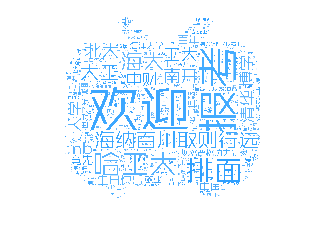

In [43]:
# 词频展示

import random

#控制字体颜色范围
def random_color(word, font_size, position, orientation, font_path, random_state):
    s = 'hsl(208, %d%%, %d%%)' % (random.randint(90, 110), random.randint(60, 70))
    return s


from wordcloud import ImageColorGenerator

mask = np.array(Image.open('xiaodianshi.png')) # 定义词频背景
#mask2 = np.array(Image.open('xiaodianshi.png')) 
#genclr=ImageColorGenerator(mask2,default_color = tuple)  

wc = wordcloud.WordCloud(
    font_path='/Users/kitty/Library/Fonts/逼格锐线粗体简2.0.TTF', # 设置字体格式
    background_color='white',#设置背景色
    mask=mask, # 设置背景图
    width =600,
    height =400,
    max_words=1000, # 最多显示词数
    max_font_size=80, # 字体最大值
    min_font_size=3,#字体最小值
    relative_scaling = 0.8,#词频与大小契合度
    collocations=False,#不重复
    colormap='Blues',#字体颜色
    color_func=random_color,
    scale=32,  # 调整图片清晰度，值越大越清楚
   
    
)

wc.generate_from_frequencies(word_counts) # 从字典生成词云
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像
wc.to_file("/Users/kitty/Desktop/py代码/ciyun.jpg")

